In [2]:
import os
import gensim
from load_vectors import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

unable to import 'smart_open.gcs', disabling that module


In [2]:
def cosine_similarity(a,b,x,y):
    a,b,x,y = wv[a], wv[b], wv[x], wv[y]
    denom = np.linalg.norm(a- b) * np.linalg.norm(x-y)
    return np.dot((a-b).T, x-y) / (denom if denom != 0 else 1e-6)
vfunc = np.vectorize(cosine_similarity)

In [5]:
def analogy0(a,b,x, topn=10, delta = None):
    y_res = wv.most_similar_cosmul(positive=[x,b], negative=[a], topn=1000*topn)
    if delta is None:
        return np.array(y_res)[:topn]
    else:
        return np.array([y for y in y_res if np.linalg.norm(wv[x] - wv[y]) < delta])[:topn]

In [181]:
analogy0('african american', 'white', 'criminal', delta=None, topn=20)

array([['black', '1.0498697757720947'],
       ['criminals', '1.0019508600234985'],
       ['criminality', '0.998856246471405'],
       ['criminial', '0.979351818561554'],
       ['crime', '0.9603862166404724'],
       ['white-collar', '0.9581645131111145'],
       ['non-criminal', '0.9548527598381042'],
       ['white-hating', '0.9515623450279236'],
       ['thug', '0.9444579482078552'],
       ['racist', '0.9402880668640137'],
       ['supremacist', '0.9368630647659302'],
       ['crimnal', '0.9360672235488892'],
       ['non-white', '0.9357785582542419'],
       ['non-felony', '0.9352330565452576'],
       ['crimal', '0.9344058036804199'],
       ['supremist', '0.9311133027076721'],
       ['crimminal', '0.9287289381027222'],
       ['criminal-', '0.9264217019081116'],
       ['felon', '0.9252679944038391'],
       ['white-', '0.9250895977020264']], dtype='<U27')

In [122]:
analogy0('african american', 'whites', 'fugitive', delta=None, topn=10)

array([['fugitives', '1.0703256130218506'],
       ['slave-catchers', '1.0322755575180054'],
       ['blacks', '1.0291696786880493'],
       ['negroes', '0.9782311320304871'],
       ['re-enslaved', '0.9573147296905518'],
       ['slave-hunters', '0.9488363862037659'],
       ['whites.The', '0.9433099627494812'],
       ['escapees', '0.9422000050544739'],
       ['negro', '0.9420299530029297'],
       ['criminals', '0.9417467713356018']], dtype='<U26')

In [132]:
analogy0('african american', 'white', 'vandal', delta=None, topn=5)

array([['vandalism', '0.9717968702316284'],
       ['black', '0.9682303667068481'],
       ['vandals', '0.9377480745315552'],
       ['white-', '0.9166638255119324'],
       ['supremacist', '0.9141943454742432']], dtype='<U23')

In [147]:
analogy0('african american', 'white', 'thieves', delta=None, topn=20)

array([['black', '1.0650075674057007'],
       ['theives', '1.0300298929214478'],
       ['thugs', '1.0157952308654785'],
       ['thieves.The', '0.9808555841445923'],
       ['crooks', '0.9792903065681458'],
       ['criminals', '0.977818489074707'],
       ['robbers', '0.9705504775047302'],
       ['thief', '0.9645818471908569'],
       ['whites', '0.9444677829742432'],
       ['hoodlums', '0.9440320730209351'],
       ['supremacists', '0.9428340792655945'],
       ['racists', '0.9416759610176086'],
       ['thiefs', '0.9395136833190918'],
       ['bandits', '0.9311843514442444'],
       ['muggers', '0.9288290143013'],
       ['robber', '0.9285845160484314'],
       ['swindlers', '0.924906849861145'],
       ['balck', '0.9160826802253723'],
       ['thieves.', '0.9152761697769165'],
       ['whtie', '0.9142570495605469']], dtype='<U25')

In [182]:
analogy0('african american', 'white', 'gang', delta=None, topn=20)

array([['black', '1.0767502784729004'],
       ['thugs', '1.039048194885254'],
       ['non-gang', '1.0209091901779175'],
       ['gangs', '1.0165619850158691'],
       ['thug', '1.0163345336914062'],
       ['supremist', '1.0098861455917358'],
       ['whtie', '1.0097661018371582'],
       ['gangbangers', '1.0025864839553833'],
       ['gangsters', '0.9908527135848999'],
       ['supremacist', '0.9904423356056213'],
       ['skinhead', '0.9871971607208252'],
       ['gang-style', '0.9810749292373657'],
       ['gang-members', '0.9791954755783081'],
       ['supremacists', '0.9771349430084229'],
       ['white-hating', '0.9738985896110535'],
       ['gang-member', '0.9697728157043457'],
       ['hoodlum', '0.9686892628669739'],
       ['supremists', '0.968567430973053'],
       ['hoodlums', '0.9659398794174194'],
       ['hoodie-wearing', '0.9659146666526794']], dtype='<U26')

In [209]:
analogy0('whites', 'african american', 'detective', delta=None, topn=20)

array([['Detective', '0.8900796175003052'],
       ['P.I.', '0.841263473033905'],
       ['sleuth', '0.8356841802597046'],
       ['dectective', '0.8346269726753235'],
       ['gumshoe', '0.8338322639465332'],
       ['supersleuth', '0.8282768130302429'],
       ['detective-like', '0.8170914053916931'],
       ['Dectective', '0.816061794757843'],
       ['super-sleuth', '0.8077383041381836'],
       ['Gumshoe', '0.8049269914627075'],
       ['Jurisfiction', '0.7959555387496948'],
       ['crime-solver', '0.7914531230926514'],
       ['sleuthing', '0.7914251685142517'],
       ['mystery-solving', '0.7908843159675598'],
       ['Edgar-nominated', '0.7853711843490601'],
       ['ex-detective', '0.784339189529419'],
       ['Adamsberg', '0.7818381190299988'],
       ['investigator', '0.7813197374343872'],
       ['Commissario', '0.7788904309272766'],
       ['Sejer', '0.7770116925239563']], dtype='<U36')

In [3]:
race = {'african_american' : ['african american', 'black','blacks'],
       'caucasian' : ['caucasian', 'white', 'whites']}

In [4]:
crime_lexicon = pd.read_csv("data/crime_lexicon.csv", index_col=0)
print(crime_lexicon.shape)
crime_lexicon.head()

(576, 2)


,query_word,word
0,assault,attack
1,assault,sexual assault
2,assault,rape
3,assault,battery
4,assault,violation


In [5]:
def cosine_similarities(word1, words_all):
    w1 = wv.get_vector(word1)
    vectors_all = [wv.get_vector(word) for word in words_all]
    return wv.cosine_similarities(w1, vectors_all)

In [6]:
sim_array = []
for r, words in race.items():
    similarities = np.zeros(len(crime_lexicon))
    for w in words:
        similarities += cosine_similarities(w, crime_lexicon.word.values) / len(words)
        
    crime_lexicon['similarity_' + r] = similarities

In [7]:
crime_lexicon.head()

,query_word,word,similarity_african_american,similarity_caucasian
0,assault,attack,0.067332,0.038630
1,assault,sexual assault,0.187763,0.092445
2,assault,rape,0.187724,0.177497
3,assault,battery,0.082161,0.100014
4,assault,violation,0.071319,0.051850


In [9]:
from scipy.stats import ks_2samp
print(ks_2samp(crime_lexicon.similarity_african_american.values,
              crime_lexicon.similarity_caucasian.values))

Ks_2sampResult(statistic=0.11284722222222222, pvalue=0.0012925144479047506)


In [87]:
crime_lexicon['diff'] = crime_lexicon.similarity_african_american - crime_lexicon.similarity_caucasian

In [88]:
crime_lexicon.describe()

,similarity_african_american,similarity_caucasian,diff
count,576.000000,576.000000,576.000000
mean,0.105702,0.095168,0.010535
std,0.047088,0.050294,0.035066
min,-0.066794,-0.038981,-0.085271
25%,0.072907,0.058747,-0.012045
50%,0.102426,0.092671,0.006212
75%,0.136089,0.126573,0.028574
max,0.268197,0.279949,0.139174


In [89]:
crime_lexicon.sort_values('diff', ascending=True).head(5)

,query_word,word,similarity_african_american,similarity_caucasian,diff
148,burglary,asportation,0.051241,0.136512,-0.085271
84,assault,misdemeanor,0.040950,0.125755,-0.084805
394,crime,misdemeanour,0.018114,0.101556,-0.083442
72,assault,felony,0.080304,0.156879,-0.076576
67,assault,mug,0.101329,0.174782,-0.073453


In [210]:
crime_lexicon.sort_values('diff', ascending=False).head(5)

,query_word,word,similarity_african_american,similarity_caucasian,diff
83,assault,statutory rape,0.184091,0.044916,0.139174
430,crime,infelonious,0.193940,0.058640,0.135300
919,gang,work party,0.183947,0.049543,0.134404
158,burglary,criminal contempt,0.202411,0.082077,0.120334
159,burglary,bolt cutter,0.149188,0.029501,0.119687


In [91]:
crime_lexicon.groupby('query_word').mean().sort_values("diff", ascending=False)

,similarity_african_american,similarity_caucasian,diff
query_word,,,
burglary,0.113536,0.093776,0.019760
drugs,0.101549,0.085052,0.016497
criminal,0.112135,0.095719,0.016416
prison,0.108561,0.093492,0.015069
crime,0.107709,0.096775,0.010935
fraud,0.087705,0.077197,0.010508
assault,0.094455,0.090336,0.004119
police,0.107968,0.105473,0.002495
gang,0.121850,0.120001,0.001849


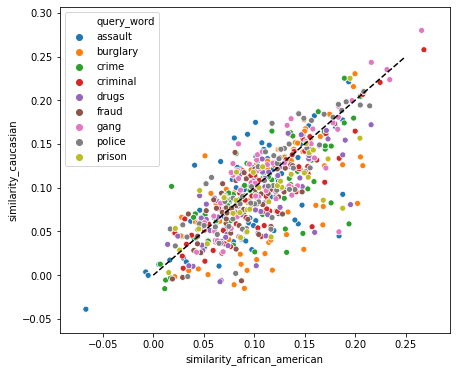

In [189]:
plt.figure(figsize=(7,6))
sns.scatterplot(x="similarity_african_american", y="similarity_caucasian", hue="query_word",
                data=crime_lexicon)
plt.plot([0,0.25], [0,0.25], c='black', linestyle='--')

plt.show()

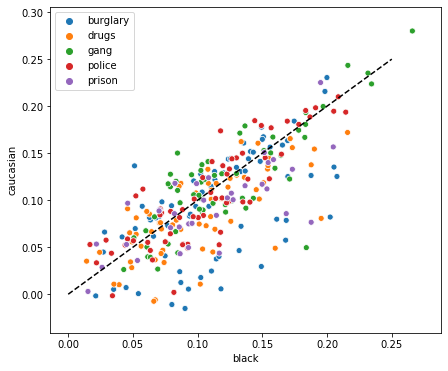

In [202]:
f, ax = plt.subplots(figsize=(7,6))
sc = sns.scatterplot(x="similarity_african_american", y="similarity_caucasian", hue="query_word",
                data=crime_lexicon.loc[crime_lexicon.query_word.isin(['burglary', 'police', 'drugs', 'prison', 'gang'])],
               ax=ax)
ax.plot([0,0.25], [0,0.25], c='black', linestyle='--')
ax.set_xlabel('black')
ax.set_ylabel('caucasian')
h,l = ax.get_legend_handles_labels()
plt.legend(h[1:],l[1:])
plt.show()

In [199]:
crime_lexicon.query_word.unique()

array(['assault', 'burglary', 'crime', 'criminal', 'drugs', 'fraud',
       'gang', 'police', 'prison'], dtype=object)